# Tools for viewing domain

This is a simple example used to make some images for a proposal, but shows a few of the ways we can make fancy images.

In [1]:
#%matplotlib osx
%matplotlib inline

In [2]:
import logging
import numpy as np
import fiona.crs
from matplotlib import pyplot as plt
from matplotlib import patches as pltp
from matplotlib import collections as pltc
import matplotlib.colors

import workflow
import workflow.ui
import workflow.warp
import workflow.plot

workflow.ui.setup_logging(1,None)

In [3]:
# set the HUC we wish to image, in this case the Delaware River Basin
HUC = '0204'
crs = fiona.crs.from_epsg('4269')

logging.info("")
logging.info("Meshing HUC: {}".format(HUC))
logging.info("="*30)
logging.info('Target projection: "{}"'.format(crs['init']))
    

2019-09-24 11:36:09,151 - root - INFO: 
2019-09-24 11:36:09,153 - root - INFO: Meshing HUC: 0204
2019-09-24 11:36:09,156 - root - INFO: ==============================
2019-09-24 11:36:09,157 - root - INFO: Target projection: "epsg:4269"


In [4]:
# get the sources
sources = workflow.source_list.get_default_sources()
sources['hydrography'] = workflow.source_list.hydrography_sources['NHD Plus']

workflow.source_list.log_sources(sources)

2019-09-24 11:36:09,170 - root - INFO: Using sources:
2019-09-24 11:36:09,177 - root - INFO: --------------
2019-09-24 11:36:09,178 - root - INFO: HUC: National Watershed Boundary Dataset (WBD)
2019-09-24 11:36:09,184 - root - INFO: hydrography: National Hydrography Dataset Plus High Resolution (NHDPlus HR)
2019-09-24 11:36:09,185 - root - INFO: DEM: National Elevation Dataset (NED)
2019-09-24 11:36:09,186 - root - INFO: soil type: National Resources Conservation Service Soil Survey (NRCS Soils)
2019-09-24 11:36:09,187 - root - INFO: land cover: National Land Cover Database (NLCD) Layer: NLCD_2016_Land_Cover_L48
2019-09-24 11:36:09,189 - root - INFO: soil thickness: None


In [5]:
# get HUC 8s in the Delaware
crs, huc = workflow.get_split_form_hucs(sources['HUC'], HUC, 8, crs=crs)

2019-09-24 11:36:09,205 - root - INFO: 
2019-09-24 11:36:09,207 - root - INFO: Preprocessing HUC
2019-09-24 11:36:09,209 - root - INFO: ------------------------------
2019-09-24 11:36:09,211 - root - INFO: Loading level 8 HUCs in 0204.
2019-09-24 11:36:09,214 - root - INFO: Using HUC file "/Users/uec/research/water/data/meshing/data/hydrography/WBD_02_GDB/WBD_02.gdb"
2019-09-24 11:36:09,503 - root - INFO:   found 17 HUCs.
2019-09-24 11:36:09,503 - root - INFO:   -- 02040206
2019-09-24 11:36:09,504 - root - INFO:   -- 02040301
2019-09-24 11:36:09,505 - root - INFO:   -- 02040302
2019-09-24 11:36:09,506 - root - INFO:   -- 02040105
2019-09-24 11:36:09,507 - root - INFO:   -- 02040201
2019-09-24 11:36:09,508 - root - INFO:   -- 02040202
2019-09-24 11:36:09,509 - root - INFO:   -- 02040102
2019-09-24 11:36:09,511 - root - INFO:   -- 02040103
2019-09-24 11:36:09,512 - root - INFO:   -- 02040106
2019-09-24 11:36:09,512 - root - INFO:   -- 02040203
2019-09-24 11:36:09,515 - root - INFO:   -- 

In [6]:
# get reaches in the area
_, reaches = workflow.get_reaches(sources['hydrography'], HUC, crs=crs)



2019-09-24 11:36:13,970 - root - INFO: 
2019-09-24 11:36:13,971 - root - INFO: Preprocessing Hydrography
2019-09-24 11:36:13,973 - root - INFO: ------------------------------
2019-09-24 11:36:13,978 - root - INFO: loading streams in HUC 0204
2019-09-24 11:36:13,981 - root - INFO: and/or bounds None
2019-09-24 11:36:13,985 - root - INFO: Using HUC file "/Users/uec/research/water/data/meshing/data/hydrography/NHDPlus_H_0204_GDB/NHDPlus_H_0204.gdb"
2019-09-24 11:36:14,166 - root - INFO: Using Hydrography file "/Users/uec/research/water/data/meshing/data/hydrography/NHDPlus_H_0204_GDB/NHDPlus_H_0204.gdb"


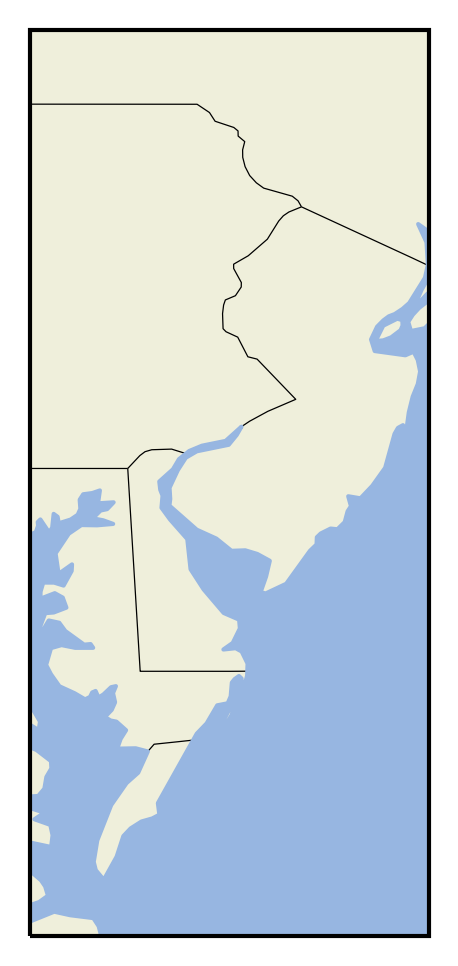

In [7]:
# make sure we have a reasonable plot of the Delaware River region
fig = plt.figure(dpi=300)
ax = workflow.plot.get_ax(crs, fig)

workflow.plot.basemap(crs, ax, '50m', state_kwargs={'linewidth':0.3})
bounds = huc.exterior().bounds
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])
plt.show()


got projection: <cartopy.crs.PlateCarree object at 0x1ae8fa468>
got projection: <cartopy.crs.PlateCarree object at 0x1ae8fa468>


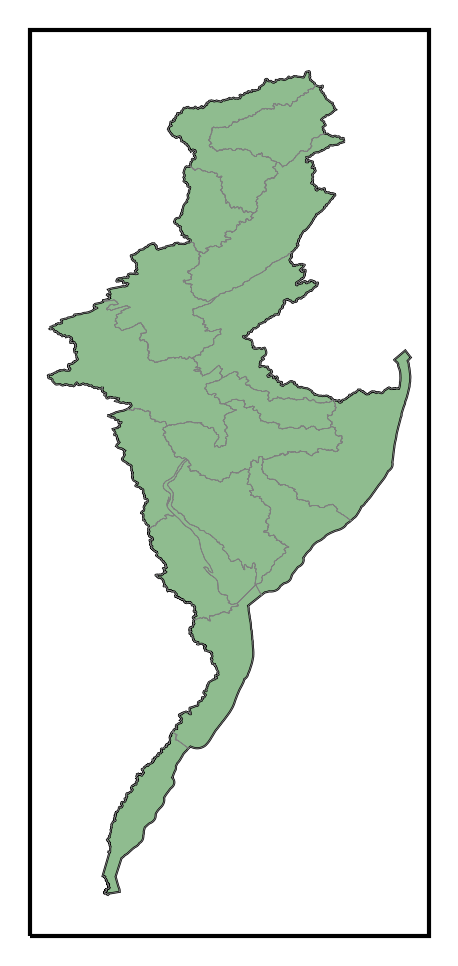

In [8]:
# make sure we have a reasonable plot of the HUCs
fig = plt.figure(dpi=300)
ax = workflow.plot.get_ax(crs, fig)

workflow.plot.huc(huc.exterior(), crs, ax=ax, facecolor='darkseagreen', linewidth=0.5)
workflow.plot.hucs(huc, crs, ax=ax, color='gray', linewidth=0.2)
plt.show()

    

got projection: <cartopy.crs.PlateCarree object at 0x1ae8fa468>


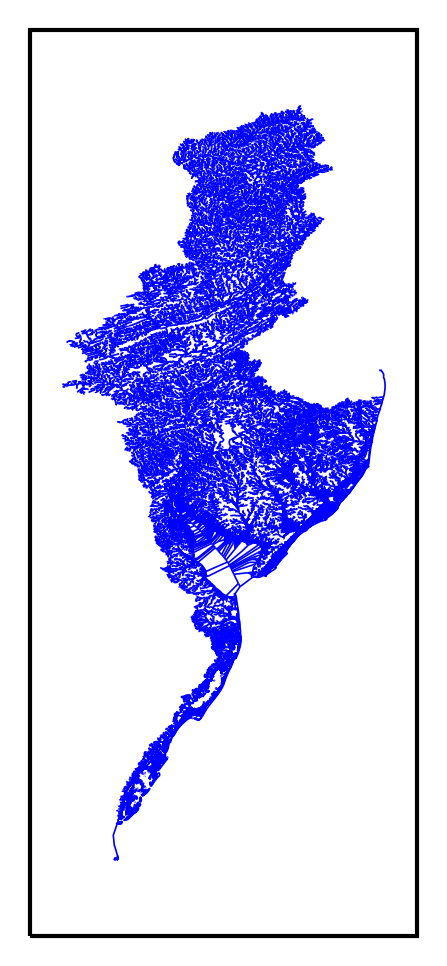

In [9]:
# plot the reaches
fig = plt.figure(dpi=300)
ax = workflow.plot.get_ax(crs, fig)

workflow.plot.river(reaches, crs, ax=ax, linewidths=0.4)
ax.autoscale()
ax.margins(0.1)
plt.show()

In [10]:
# we want the main channel.  This was available in a shapefile
_, delriv = workflow.get_shapes('../data/hydrologic_units/others/Delaware/delriv/delawareriver.shp', -1, crs)


2019-09-24 11:37:59,846 - root - INFO: 
2019-09-24 11:37:59,849 - root - INFO: Preprocessing Shapes
2019-09-24 11:37:59,850 - root - INFO: ------------------------------
2019-09-24 11:37:59,851 - root - INFO: loading file: "../data/hydrologic_units/others/Delaware/delriv/delawareriver.shp"
/Users/uec/codes/anaconda/3/envs/ats_meshing_20190719/lib/python3.7/site-packages/fiona/collection.py:336: FionaDeprecationWarning: Collection slicing is deprecated and will be disabled in a future version.
  return self.session.__getitem__(item)


got projection: <cartopy.crs.PlateCarree object at 0x1ae8fa468>
got projection: <cartopy.crs.PlateCarree object at 0x1ae8fa468>
got projection: <cartopy.crs.PlateCarree object at 0x1ae8fa468>
got projection: <cartopy.crs.PlateCarree object at 0x1ae8fa468>
got projection: <cartopy.crs.PlateCarree object at 0x1ae8fa468>


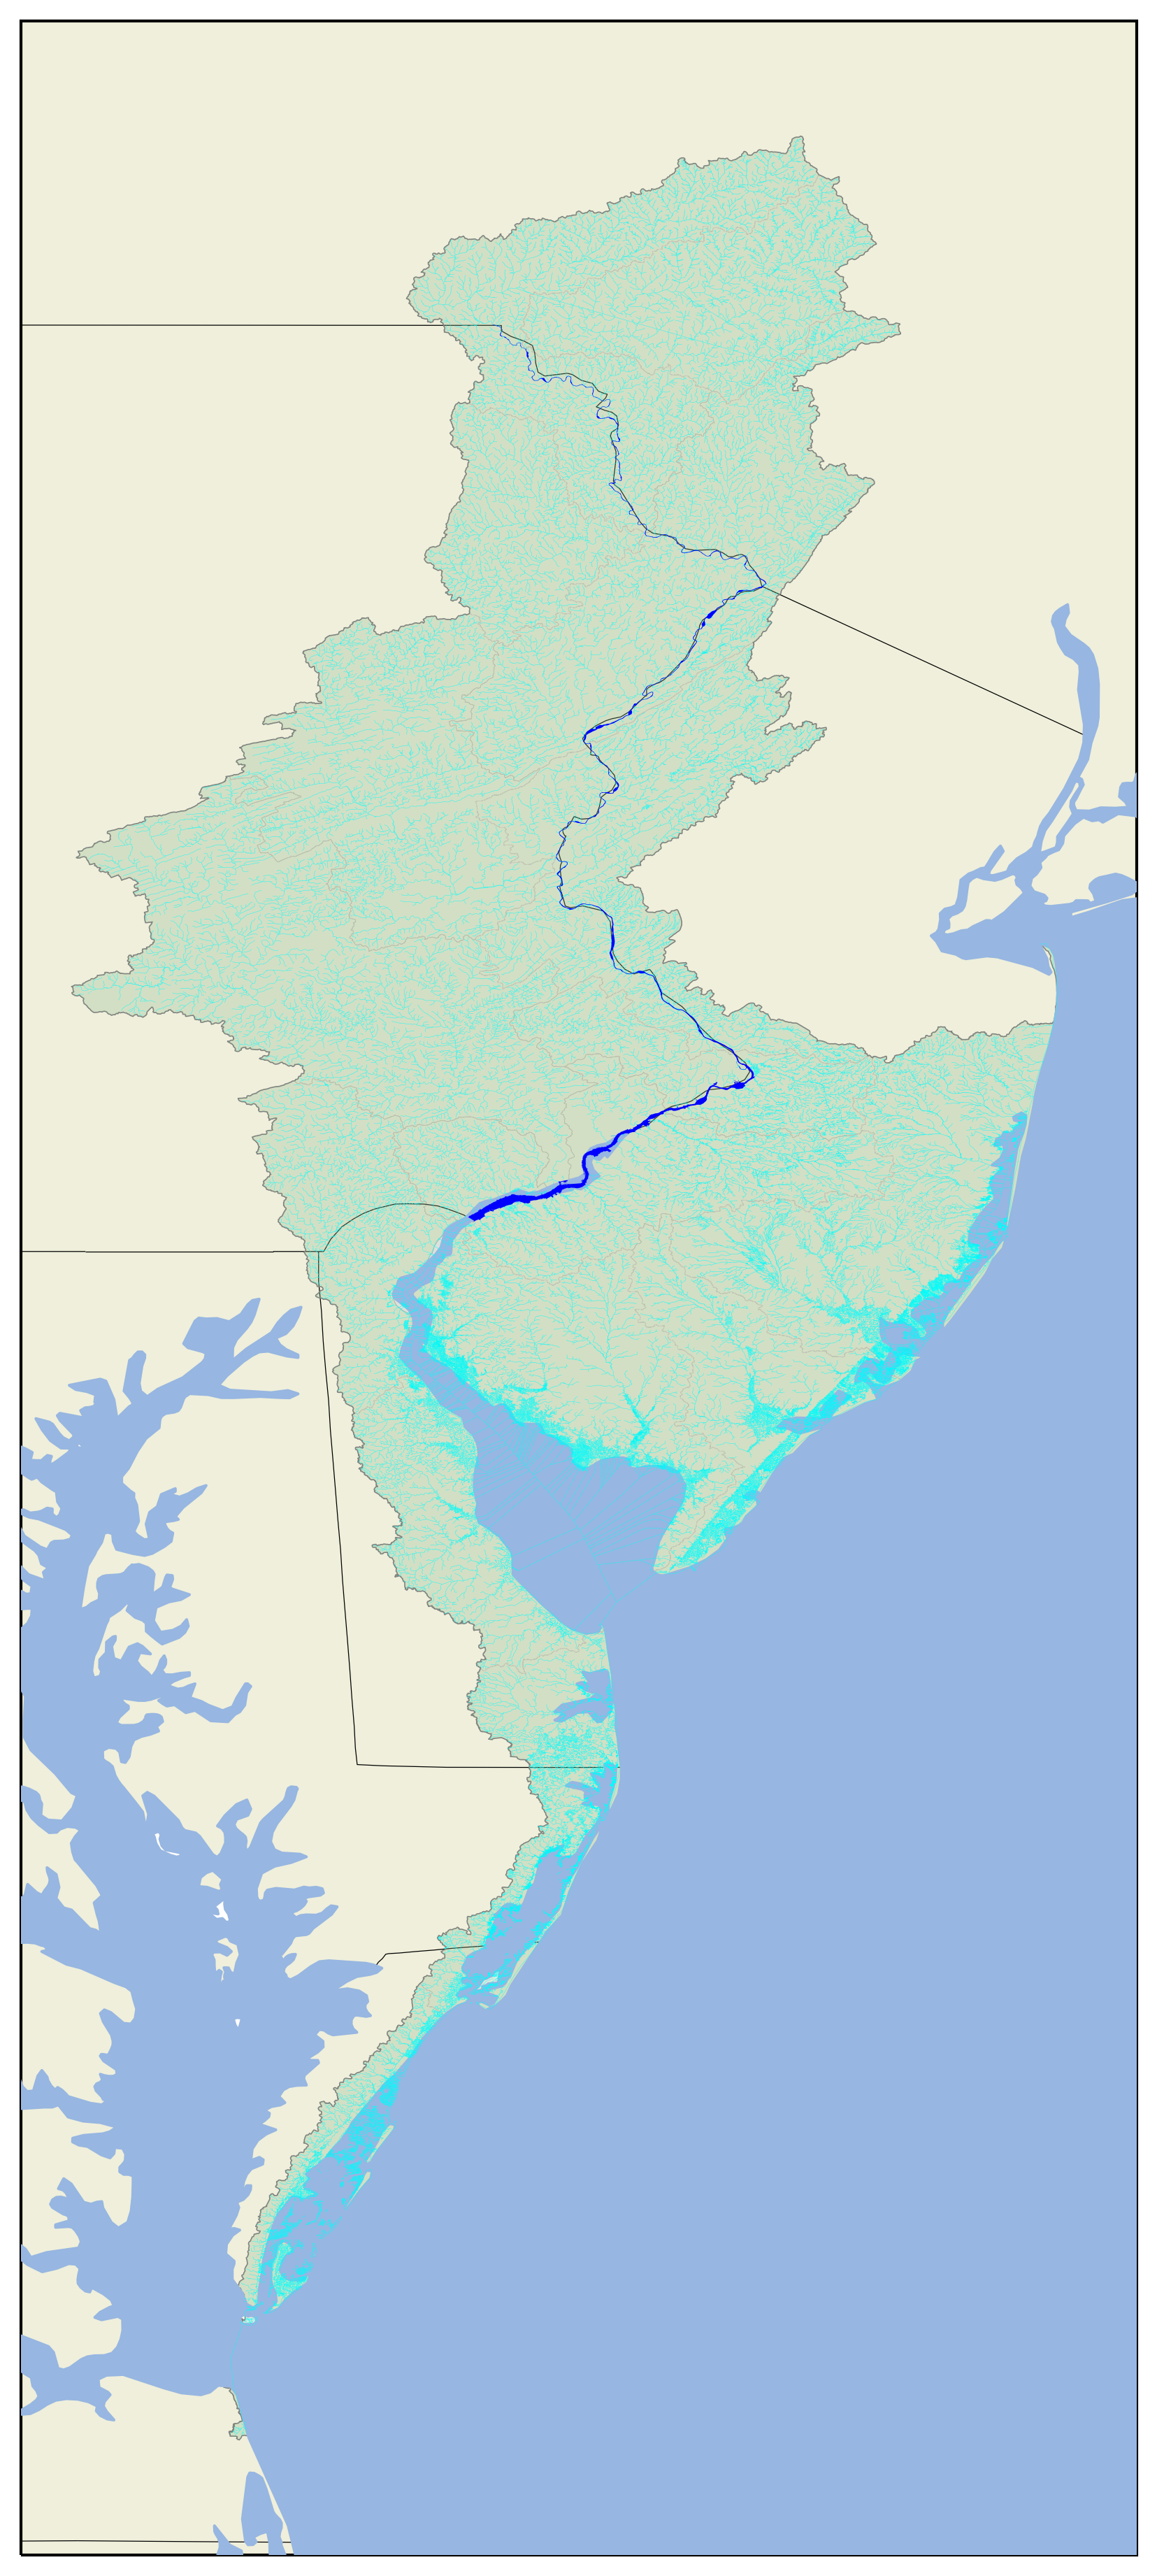

In [11]:
# bring them all together in a single plot
#
# Note, we have to manage the layer order in matplotlib to get these to appear correctly.  This uses the zorder
# option available in most matplotlib plotting methods.

fig = plt.figure(dpi=300, figsize=(16,16))
ax = workflow.plot.get_ax(crs, fig)

workflow.plot.basemap(crs, ax, '10m', land_kwargs={'zorder':0}, 
                      ocean_kwargs={'zorder':5}, state_kwargs={'linewidth':0.3, 'zorder':1, 'color':'k'})
workflow.plot.huc(huc.exterior(), crs, ax=ax, color='gray', linewidth=0.4, zorder=2)

huc8s_delbay = [h8 for h8 in huc.polygons() if h8.properties['Name'] == 'Delaware Bay']
huc8s_not_delbay = [h8 for h8 in huc.polygons() if h8.properties['Name'] != 'Delaware Bay']

workflow.plot.shply(huc8s_delbay, crs, ax=ax, edgecolor='gray', facecolor='lightsteelblue', 
                    alpha=0.3, linewidth=0.2, zorder=3)
workflow.plot.shply(huc8s_not_delbay, crs, ax=ax, edgecolor='gray', facecolor='darkseagreen', 
                    alpha=0.3, linewidth=0.2, zorder=4)

workflow.plot.shply(reaches, crs, ax=ax, color='cyan', linewidth=0.1, zorder=6)
workflow.plot.shply(delriv, crs, ax=ax, facecolor='b', linewidth=0., zorder=7)
#plt.savefig('delaware_river_map')
plt.show()